In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
#Step 1: Download first 20000 training images from database
mnist = fetch_openml('mnist_784', version=1) 
dataset = mnist["data"]
dataset = dataset[:2000]

In [3]:
print(dataset.shape)

(2000, 784)


In [4]:
#Step 2: Perform a k-means clustering consisted of our 2000 images

#data: matrix with images
#K: number of clusters
#M: number of initializations
def kmeans(data, K, M):
    num_points = len(data)
    
    #converts dataset to 1-D array
    data = np.asarray(data)
    
    #cluster assignments with lowest loss functions
    final_clusters = []
    
    #k centroids with lowest loss functions
    final_centroids = []
    
    #sequence of vals of loss function over k-means interations
    losses = []
    
    #set of N terminl loss function vals for all initializations
    final_losses = []
    
    MSEs = []
    
    #run outer for loop depending on M initializations
    for i in range(M):
        #defines which of the K centroids each row of the matrix is closest to
        class_list = np.zeros(num_points)
        
        #initialize our random K centroids
        inits = np.random.choice(2000, K, replace=False)
        
        #fill initial centroid list with K random points from the matrix
        centroids = np.asarray([data[index] for index in inits])

        loss = []
        while True:
            #calculate the distance of all instances to the K centroids and assign instances to closest centroid
            for j in range(num_points):
                #caluclate the Euclidean distance for all of our data points
                distances = np.linalg.norm(data[j]-centroids, axis=1)
                
                #assign each data point to the closest cluster centroid
                cluster = np.argmin(distances)
                
                #keep track of which cluster each data point is in
                class_list[j] = cluster
                
            #make a copy of our current centroids so we can compare to the new ones later
            test = np.copy(centroids)
            
            #initialize our loss value for this iteration
            loss_value = 0
            
            #recompute the K centroids by caclulating loss function
            for j in range(K):
                #find all points associated with respective centroid
                cluster_points = []
                for m in range(num_points):
                    if class_list[m] == j:
                        cluster_points.append(dataset[m])
                
                #calculate new centroids
                centroids[j] = np.mean(cluster_points, axis=0)
                
                #calculate MSE for each point
                for item in cluster_points:
                    loss_value += np.linalg.norm(item-centroids[j])
            loss_value = loss_value / num_points
            loss.append(loss_value)
            
            #if all new centroids are equal to the old centroids:
            if np.all(np.equal(test, centroids)):
                break
        
        MSEs.append(loss_value)
        final_centroids.append(centroids)
        final_clusters.append(cluster_points)
        losses.append(loss)
        final_losses.append(loss[-1])
        plt.plot(loss)
        plt.title("Iteration: {}".format(i+1))
        plt.xlabel("K-value")
        plt.ylabel("Loss")
        plt.show()

    #plot MSEs over the M iterations
    x = []
    for iteration in range(M):
        x.append(iteration)
    plt.plot(x, MSEs)    
    plt.title("MSE Values over M Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.show()
    
    min_index = final_losses.index(min(final_losses))
    best_values = [final_centroids[min_index], final_clusters[min_index], losses[min_index], final_losses]
    return best_values

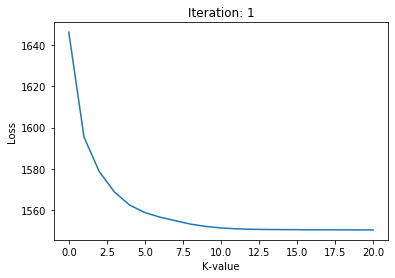

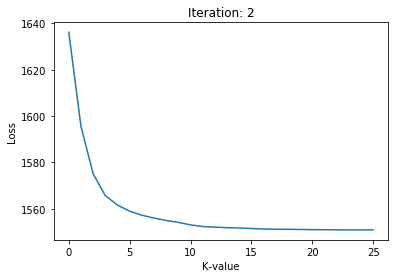

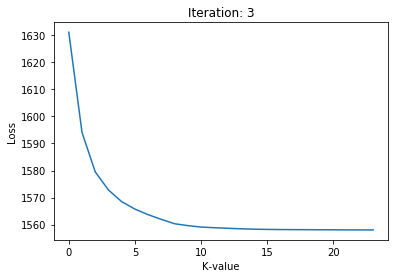

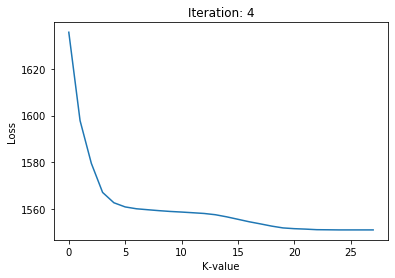

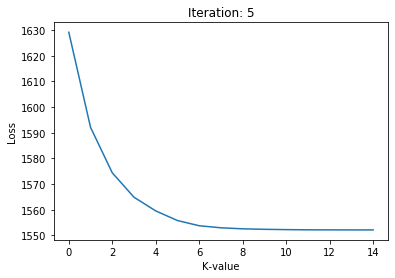

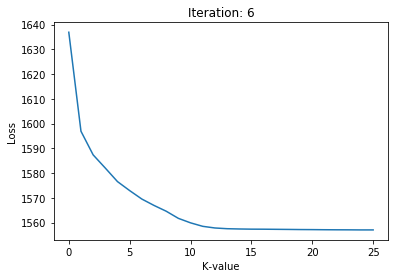

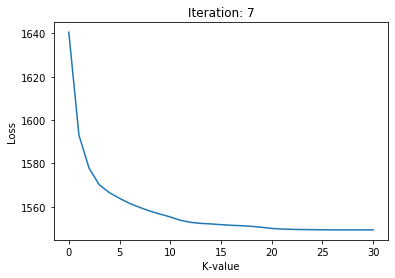

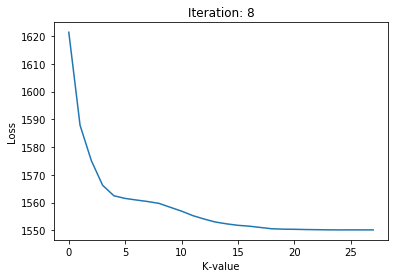

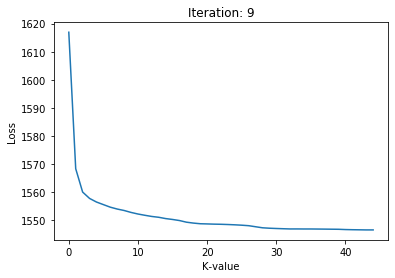

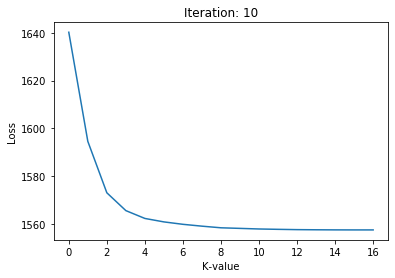

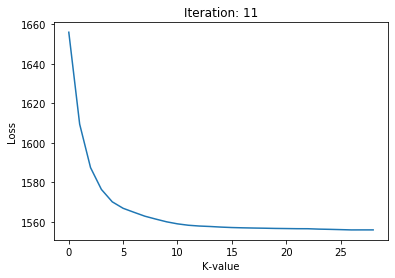

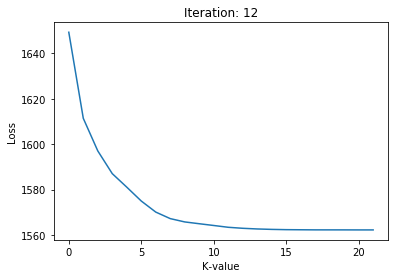

In [ ]:
K = 10
M = 15
results = []
results = kmeans(dataset,K,M)

print("Best K final centroids:\n", results[0])
print("\nBest final cluster assignments:\n", results[1])
print("\nAll loss values of the best k-means iteration:\n", results[2])
print("\nFinal losses of all N iterations:\n", results[3])